In [1]:
import pandas as pd
import numpy as np
import datetime
import time

import matplotlib.pyplot as plt
from matplotlib import dates as ds
plt.style.use('ggplot')
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### Read in datasets as dataframes

In [2]:
cdr = pd.read_csv("https://raw.githubusercontent.com/worldbank/Python-for-Data-Science/master/July_2019_Poverty_GP/day_4/cdr_flowminder_data/cdr.csv")
locations = pd.read_csv("https://raw.githubusercontent.com/worldbank/Python-for-Data-Science/master/July_2019_Poverty_GP/day_4/cdr_flowminder_data/locations.csv")

In [4]:
# Display the first five observations of the cdr dataframe 

# YOUR CODE HERE
cdr.head()

,subscriber_id,date,time,location_id,outgoing
0,05B835LA29,2016-05-01,22:17:24,0,False
1,05B835LA29,2016-05-01,22:17:24,2,False
2,05B835LA29,2016-05-01,22:17:24,3,False
3,05B835LA29,2016-05-25,18:18:22,0,True
4,05B835LA29,2016-05-25,18:18:22,2,True


In [5]:
# How many observations do we have in the cdr dataframe?

# YOUR CODE HERE 

cdr.shape

(1742, 5)

In [4]:
# Display the first five observations of the locations dataframe

# YOUR CODE HERE

,location_id,lon,lat,admin1,admin2,admin3
0,0,-63.08445,21.310360,Southern,Epsilon,Colaco
1,1,-62.99838,21.290370,Eastern,Omega,Almendra
2,2,-63.08755,21.318560,Southern,Epsilon,Colaco
3,3,-63.08885,21.339860,Southern,Epsilon,Colaco
4,4,-62.25713,21.496287,Western,Beta,Arbol


In [8]:
# How many observations do we have in the locations dataframe? 

# YOUR CODE HERE 


(87, 6)

### Join the datasets together to map locations to each call

In [6]:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html 

# Edit the code below to join the dataframes

df = cdr.merge(locations, on='location_id', how='inner')

In [8]:
# Display the first five rows to make sure the two dataframes (cdr and locations) are merged

# Notice that we now have 10 columns

df.head()

,subscriber_id,date,time,location_id,outgoing,lon,lat,admin1,admin2,admin3
0,05B835LA29,2016-05-01,22:17:24,0,False,-63.08445,21.31036,Southern,Epsilon,Colaco
1,05B835LA29,2016-05-25,18:18:22,0,True,-63.08445,21.31036,Southern,Epsilon,Colaco
2,05B835LA29,2016-05-16,14:40:50,0,False,-63.08445,21.31036,Southern,Epsilon,Colaco
3,05B835LA29,2016-05-16,08:50:57,0,False,-63.08445,21.31036,Southern,Epsilon,Colaco
4,05B835LA29,2016-05-24,06:30:36,0,False,-63.08445,21.31036,Southern,Epsilon,Colaco


### How many subscribers in dataset?

In [9]:
# Hint: Use .nunique()
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nunique.html 

#YOUR CODE HERE

df.subscriber_id.nunique()

3

### What is the time period of the dataset?

In [12]:
# Hint: Use .max() .min()

#YOUR CODE HERE

df.date.min(), df.date.max()

('2016-05-01', '2016-05-30')

### How many locations has each subscriber been seen at?

In [16]:
# Cell towers per subscriber

# Use df.groupby() 
# Always a good idea to Google if you don't know how: 
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html

df.groupby('subscriber_id').count()

,date,time,location_id,outgoing,lon,lat,admin1,admin2,admin3
subscriber_id,,,,,,,,,
016C400K3S,740,740,740,740,740,740,740,740,740
022D513G64,668,668,668,668,668,668,668,668,668
05B835LA29,334,334,334,334,334,334,334,334,334


In [20]:
# Admin3 regions per subscriber


subscriber_id
016C400K3S    6
022D513G64    9
05B835LA29    2
Name: admin3, dtype: int64

In [21]:
# Admin2 regions per subscriber


subscriber_id
016C400K3S    4
022D513G64    5
05B835LA29    2
Name: admin2, dtype: int64

In [22]:
# Admin1 regions per subscriber


subscriber_id
016C400K3S    1
022D513G64    1
05B835LA29    2
Name: admin1, dtype: int64

### Maximum cell towers / regions visited in a single day

In [25]:
# Maximum number of cell towers
sorted(df.groupby(['subscriber_id', 'date'])['location_id'].nunique(), reverse=True)[0]

25

In [26]:
# Maximum number of admin3 regions


6

In [27]:
# Maximum number of admin2 regions


4

In [28]:
# Maximum number of admin1 regions


2

### Number of days that each subscriber is active

In [49]:
df.groupby('subscriber_id')['date'].nunique()

subscriber_id
016C400K3S    30
022D513G64    30
05B835LA29    29
Name: date, dtype: int64

### Average number of events per day for each subscriber

In [36]:
# Hint: groupby 'subscriber_id' AND 'date' and get counts of 'time'

events_per_day = df.groupby(['subscriber_id', 'date'])['time'].count()\
                    .reset_index()
events_per_day.head()

,subscriber_id,date,time
0,016C400K3S,2016-05-01,23
1,016C400K3S,2016-05-02,3
2,016C400K3S,2016-05-03,18
3,016C400K3S,2016-05-04,23
4,016C400K3S,2016-05-05,22


In [38]:
# Then, group this by subscriber id and get the average for counts of time

subscriber_id
016C400K3S    24.666667
022D513G64    22.266667
05B835LA29    11.517241
Name: time, dtype: float64

### Daily activity patterns

In [39]:
# Look up how lambda functions work!

df['hour'] = df['time'].apply(lambda x:pd.to_datetime(x).hour)

In [40]:
hourly_counts = pd.DataFrame(df['hour'].value_counts())

In [47]:
hourly_counts.sort_values('hour')

,hour
0,4
1,4
2,6
3,14
23,15
4,32
22,43
11,64
6,65
5,69


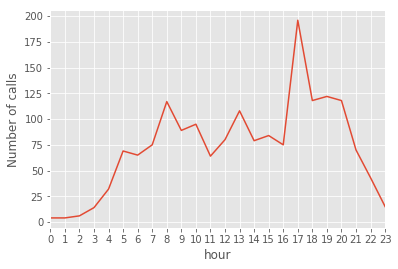

In [41]:
# Plot how number of calls is distributed by time

# Complete the code below
hourly_counts.sort_index()['      '].plot();
plt.xlabel('    ');
plt.xticks(range(24));
plt.ylabel('    ');

### Find home locations

In [48]:
# One of the simplest methods is to find the location where the most calls were made/received during the period
# This is called the 'modal location'

for subs in df['subscriber_id'].unique():
    print(subs)
    print (df[df['subscriber_id'] == subs]\
          .groupby(['admin3'])['time']\
          .count())
    print('\n')
    
# From the output below, you can find the region with the highest number of counts

05B835LA29
admin3
Almendra      1
Colaco      333
Name: time, dtype: int64


016C400K3S
admin3
Arbol     690
Colina     23
Flores      2
Palma      23
Rosa        1
Vista       1
Name: time, dtype: int64


022D513G64
admin3
Boise       82
Dulce        5
Flores       9
Funda        1
Hormiga    516
Liana        6
Maris       46
Mayor        2
Vista        1
Name: time, dtype: int64


